## Install everything in `README.md` before going through this.

Copied from [the youtube video](https://youtu.be/VgcLqqOlO14)

In [1]:
import gym
import iglu

/home/tk/.virtualenvs/iglu/lib/python3.8/site-packages/gym-0.18.3-py3.8.egg/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/tk/.virtualenvs/iglu/lib/python3.8/site-packages/gym-0.18.3-py3.8.egg/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
env = gym.make('IGLUSilentBuilder-v0')

In [3]:
env.observation_space

Dict(agentPos:Box(low=-180.0, high=180.0, shape=(5,)), chat:<iglu.handlers.String object at 0x7f818207d8e0>, compass:Dict(angle:Box(low=-180.0, high=180.0, shape=())), grid:Box(low=0.0, high=6.0, shape=(9, 11, 11)), inventory:Box(low=0.0, high=20.0, shape=(6,)), pov:Box(low=0, high=255, shape=(64, 64, 3)))

In [4]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image

In [5]:
obs = env.reset()

/home/tk/.virtualenvs/iglu/lib/python3.8/site-packages/gym-0.18.3-py3.8.egg/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/tk/.virtualenvs/iglu/lib/python3.8/site-packages/gym-0.18.3-py3.8.egg/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/lib/python3.8/runpy.py:127: RuntimeWarning: 'minerl_patched.utils.process_watcher' found in sys.modules after import of package 'minerl_patched.utils', but prior to execution of 'minerl_patched.utils.process_watcher'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


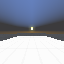

In [6]:
display(Image.fromarray(obs['pov'], ))

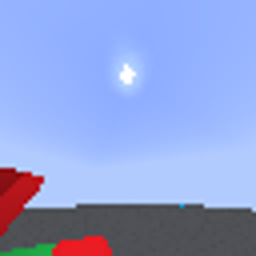

In [7]:
total_reward = 0.
done = False
while not done:
    display(Image.fromarray(obs['pov'], ).resize((256,256)), )
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    total_reward += reward
    clear_output(wait=True)

In [8]:
total_reward

-12.0

In [9]:
obs['grid'].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]),
 array([2, 2, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 4, 4, 4, 4]),
 array([0, 4, 0, 0, 1, 2, 3, 5, 7, 1, 2, 4, 1, 6, 0, 4, 5, 7]))

In [10]:
len(obs['grid'].nonzero()[0])

18

In [11]:
obs.keys()

dict_keys(['pov', 'agentPos', 'compass', 'inventory', 'chat', 'grid'])

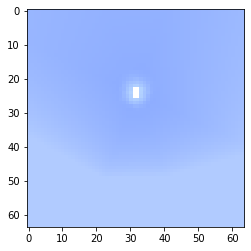

In [12]:
plt.imshow(obs['pov'])

In [13]:
print(obs['chat'])

<Builder> Mission has started.
<Builder> hello. what are we building this time?
<Architect> hello builder, one moment
<Architect> ok, to get started we need to place 4 orange blocks as if they are the corners of a 3x3 square, all of them on the ground
<Builder> can i put them anywhere?
<Architect> yes, the rest of the structure extends upwards
<Architect> perfect
<Architect> one moment while i look at the structure
<Architect> the second level of the structure consists wholly of red blocks. start by putting a red block on each orange block
<Architect> good, now please fill in the outer sides of the second level 3x3 square but leave the middle open
<Architect> using red blocks
<Builder> okay
<Architect> good job builder, we have completed yet another flawless structure!
<Builder> its a table?
<Builder> good job
<Architect> i don't know what it is


In [14]:
{k: obs[k].shape for k in ['pov', 'agentPos', 'inventory', 'grid']}

{'pov': (64, 64, 3), 'agentPos': (5,), 'inventory': (6,), 'grid': (9, 11, 11)}

In [15]:
obs['agentPos']

array([ -1.77604469,   0.41999999,  -2.25154812, -63.87334   ,
       202.89645   ])

In [16]:
obs['inventory']

array([10., 14., 14., 14., 10., 13.], dtype=float32)

In [17]:
info['target_grid'][:2, :4, :4]

array([[[4, 0, 4, 0],
        [0, 0, 0, 0],
        [4, 0, 4, 0],
        [0, 0, 0, 0]],

       [[6, 6, 6, 0],
        [6, 0, 6, 0],
        [6, 6, 6, 0],
        [0, 0, 0, 0]]], dtype=int32)

In [18]:
for ep in range(2):
    obs = env.reset()
    done = False
    with tqdm() as bar:
        while not done:
            bar.update(1)
            action = env.action_space.sample()
            obs, reward, done, info = env.step(action)

500it [00:15, 32.79it/s]
500it [00:10, 45.96it/s]


In [19]:
gym.make('IGLUSilentBuilder-v0', action_space='discrete').action_space

Dict(attack:Discrete(2), camera:Box(low=-180.0, high=180.0, shape=(2,)), hotbar:Discrete(7), jump:Discrete(2), move:Discrete(3), strafe:Discrete(3), use:Discrete(2))

In [20]:
gym.make('IGLUSilentBuilder-v0', action_space='continuous').action_space

Dict(attack:Discrete(2), camera:Box(low=-180.0, high=180.0, shape=(2,)), hotbar:Discrete(7), move_x:Box(low=-1.0, high=1.0, shape=()), move_y:Box(low=-1.0, high=1.0, shape=()), move_z:Box(low=-1.0, high=1.0, shape=()), use:Discrete(2))

In [21]:
gym.make('IGLUSilentBuilder-v0', action_space='human-level').action_space

Dict(attack:Discrete(2), back:Discrete(2), camera:Box(low=-180.0, high=180.0, shape=(2,)), forward:Discrete(2), hotbar:Discrete(7), jump:Discrete(2), left:Discrete(2), right:Discrete(2), use:Discrete(2))

In [22]:
env.tasks

TaskSet("C8")

In [23]:
obs = env.reset()

In [24]:
env.tasks.current.chat

"<Builder> Mission has started.\n<Builder> hello. what are we building this time?\n<Architect> hello builder, one moment\n<Architect> ok, to get started we need to place 4 orange blocks as if they are the corners of a 3x3 square, all of them on the ground\n<Builder> can i put them anywhere?\n<Architect> yes, the rest of the structure extends upwards\n<Architect> perfect\n<Architect> one moment while i look at the structure\n<Architect> the second level of the structure consists wholly of red blocks. start by putting a red block on each orange block\n<Architect> good, now please fill in the outer sides of the second level 3x3 square but leave the middle open\n<Architect> using red blocks\n<Builder> okay\n<Architect> good job builder, we have completed yet another flawless structure!\n<Builder> its a table?\n<Builder> good job\n<Architect> i don't know what it is"

In [25]:
from iglu.tasks import TaskSet

env.update_taskset(TaskSet(preset=['C1', 'C2', 'C3']))
env.tasks

TaskSet("C1", "C2", "C3")

In [26]:
import numpy as np
from iglu.tasks import CustomTasks

custom_grid = np.zeros((9, 11, 11))
custom_grid[:3, 5, 5] = 1
env.update_taskset(CustomTasks(
[
    ('<Architect> Please, build a stack of three blue blocks somewhere.\n'
     '<Builder> Sure.',
     custom_grid)
]
))
obs = env.reset()

In [27]:
print(env.tasks.current.chat)

<Architect> Please, build a stack of three blue blocks somewhere.
<Builder> Sure.


In [28]:
from iglu.tasks import RandomTasks

env.update_taskset(RandomTasks(max_blocks=3, max_dist=5, num_colors=3))

In [29]:
env.tasks

RandomTasks(max_blocks=3, height_levels=1, allow_float=False, max_dist=5, num_colors=3, max_cache=0)

In [30]:
env.tasks.sample().target_grid.nonzero()

(array([0, 0, 0]), array([2, 5, 5]), array([8, 4, 6]))

In [31]:
env.close()